# Feature Tracking
Various feature tracking algorithms

In [543]:
import numpy as np
from scipy import ndimage as nd
import math
from PIL import Image
import matplotlib.pyplot as plt

In [544]:
# Gradient in x-direction
def Sobelx(image):
    sobelx = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])
    Ix = nd.convolve(image,sobelx)           
    return Ix


# Gradient in y-direction
def Sobely(image):
    sobely = np.array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]])

    Iy = nd.convolve(image,sobely)
    return Iy


# Convert RGB to grayscale
def rgb2gray(image):
    image = np.array(image)
    r, c, ch = image.shape
    gray = np.zeros([r,c])

    gray = np.mean(image, axis=2)
    return gray


# Reduce image size
def reduceRes(image,factor):
    r,c = image.size
    r = np.int(np.floor(r/factor))
    c = np.int(np.floor(c/factor))
    new = image.resize((r,c))
    return new


# Box filter for smoothing
def boxFilter(image,rc):
    box = np.ones([rc,rc])/rc**2
    image = nd.convolve(gray,box)
    return image


# Harris Corner Detector
The Harris corner detector is a corner detection operator that is commonly used in computer vision algorithms to extract corners and infer features of an image. It was first introduced by Chris Harris and Mike Stephens in 1988 upon the improvement of Moravec's corner detector.[1] Compared to the previous one, Harris' corner detector takes the differential of the corner score into account with reference to direction directly, instead of using shifting patches for every 45 degree angles, and has been proved to be more accurate in distinguishing between edges and corners.[2] Since then, it has been improved and adopted in many algorithms to preprocess images for subsequent applications.

In [545]:
# Load image
file = 'boston_skyline.jpg'
image = Image.open(file)

# Reduce resolution
image = reduceRes(image,2)

# Convert to grayscale
gray = rgb2gray(image)

In [546]:
def HarrisCorner(image,threshold):
    corners = np.zeros([image.shape[0],image.shape[1]])

    # Find gradients
    Ix = Sobelx(image)
    Iy = Sobely(image)

    Ixx = Ix**2
    Iyy = Iy**2

    detM = Ixx*Iyy
    traceM = Ixx+Iyy
    k = 0.05
    R = detM - k*traceM**2

    # Threshold values
    corners = R >= threshold*np.amax(R)

    # Nonmax Supression
    #corners = nd.maximum_filter(corners, size=[5,5])
    #corners = 1*( R >= threshold*np.amax(R))

    return corners

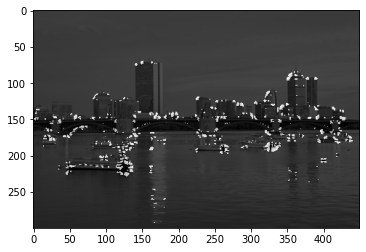

In [547]:
# Smooth image
smooth = boxFilter(gray,5)

threshold = 0.01
corners = HarrisCorner(smooth,threshold)
plt.imshow(gray, cmap = "gray")
plt.imshow(corners, cmap = "gray", alpha=0.7)

Split images for testing

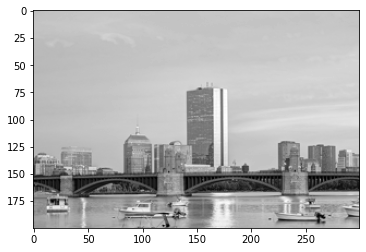

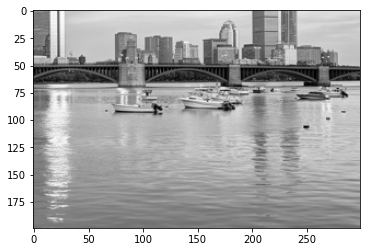

In [548]:
# Load image
file = 'boston_skyline.jpg'
image = Image.open(file)

# Reduce resolution
image = reduceRes(image,2)

# Convert to grayscale
gray = rgb2gray(image)

r,c = gray.shape

topleft = gray[0:np.int(np.floor(r-r/3)), 0:np.int(np.floor(c-c/3))]
botright = gray[np.int(np.floor(r-2*r/3)):-1, np.int(np.floor(c-2*c/3)):-1]

plt.imshow(topleft,cmap ='gray')
plt.show()
plt.imshow(botright,cmap ='gray')

In [549]:
rows = 15
test = np.zeros([rows,rows])
for i in range(np.int(rows/2+1)):
    test[i:-i,i:-i] = i
test[5,5] = rows
test[10,5] = rows
test[5,10] = rows
test[10,10] = rows

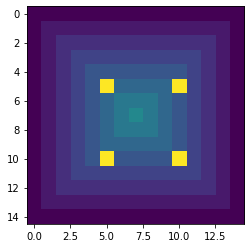

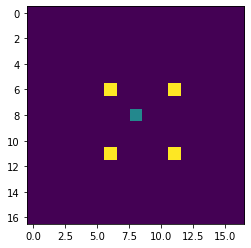

In [550]:
def peaks(image,window):
    
    # Pad image with zeros
    def pad(image,window):
        factor = int(np.floor(window/2))

        r_img, c_img = image.shape
        pad = np.zeros([r_img,factor])
        image = np.hstack([pad,image,pad])

        r_img, c_img = image.shape
        pad = np.zeros([factor,c_img])
        image = np.vstack([pad,image,pad])

        return image
    
    image = pad(image,window)
    peaks = np.zeros([image.shape[0],image.shape[1]])

    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            window = image[i-1:i+2,j-1:j+2]
            if image[i,j]==np.amax(window):
                peaks[i,j] = image[i,j]

    return peaks

plt.imshow(test)
image = peaks(test,3)
plt.show()
plt.imshow(image)